In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Show full content of each 

In [ ]:
root = 'KuaiRec 2.0/'

joined_train_data = pd.read_csv(root + 'data_exports/joined_train_data.csv')

In [3]:
joined_train_data.columns

Index(['user_id', 'video_id', 'time', 'watch_ratio', 'user_active_degree',
       'is_lowactive_period', 'is_live_streamer', 'is_video_author',
       'follow_user_num', 'fans_user_num', 'friend_user_num', 'register_days',
       'author_id', 'video_type', 'video_tag_name', 'video_duration',
       'show_cnt', 'play_cnt', 'play_duration', 'like_cnt', 'comment_cnt',
       'share_cnt', 'follow_cnt', 'collect_cnt', 'manual_cover_text',
       'caption', 'topic_tag', 'first_level_category_name',
       'second_level_category_name', 'third_level_category_name',
       'english_caption', 'english_first_level_category_name',
       'english_second_level_category_name',
       'english_third_level_category_name', 'english_topic_tag'],
      dtype='object')

In [4]:
joined_train_data.head(10)

,user_id,video_id,time,watch_ratio,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,fans_user_num,friend_user_num,register_days,author_id,video_type,video_tag_name,video_duration,show_cnt,play_cnt,play_duration,like_cnt,comment_cnt,share_cnt,follow_cnt,collect_cnt,manual_cover_text,caption,topic_tag,first_level_category_name,second_level_category_name,third_level_category_name,english_caption,english_first_level_category_name,english_second_level_category_name,english_third_level_category_name,english_topic_tag
0,14,148,2020-07-05 05:27:48.378,0.722103,full_active,0,0,1,73,6,1,279,6332,NORMAL,"女青年, 生活, 男孩",6066.0,4707742,4912021,61121035381,31199,4574,577,2081,7.0,UNKNOWN,美60岁奶奶与21少年一见钟情，兴奋分享初次体验，称：升华了感情！ @推广小助手(O40300047),[],情感,情感关系,亲密关系,"A 60-year-old American grandmother fell in love with a 21-year-old boy at first sight, and excitedly shared her initial experience, saying: ""It has elevated our relationship!""",Emotion,Emotional relationships,Intimate relationship,[]
1,14,183,2020-07-05 05:28:00.057,1.907377,full_active,0,0,1,73,6,1,279,7626,NORMAL,"资讯, 饮料",6100.0,8921102,9171385,122510986250,210670,5684,1496,5427,10.0,UNKNOWN,合肥高铁南站，他带了瓶开过封的茅台被拦下，酒值4000元他舍不得扔，就一饮而尽。,[],民生资讯,社会事件,UNKNOWN,"At Hefei High-Speed Rail South Station, he was stopped when he tried to bring a half-open bottle of Maotai, which was worth 4000 yuan. He couldn't bear to throw it away and drank it all in one go.",Public information on livelihood issues,Social events,UNKNOWN,[]
2,14,3649,2020-07-05 05:29:09.479,2.063311,full_active,0,0,1,73,6,1,279,7136,NORMAL,"搞笑, 电梯",10866.0,13817219,14272327,244388991792,279456,5900,8383,17386,7.0,UNKNOWN,美女裤兜上插“菜刀”吓坏旁人 哦豁，拔出来才发现是手机壳,[],民生资讯,社会事件,社会新闻,"A beautiful lady had a ""knife"" stuck in her pants pocket, scaring people nearby; oh well, it turned out to be just a phone case.",Public information on livelihood issues,Social events,Social news,[]
3,14,5262,2020-07-05 05:30:43.285,0.566388,full_active,0,0,1,73,6,1,279,1854,NORMAL,"亲子, 新生儿",7907.0,23882869,23198459,265532315976,1363469,29188,8583,112330,576.0,生了个洋娃娃,生了个洋娃娃，婆婆非要发出来给大家看看，看看有没有人点赞，一分钟催我看一下，一分钟催我看一下😂,[],时尚,穿搭,UNKNOWN,"Had a doll baby, grandma insisted on showing it to everyone to see if anyone would like it. She kept urging me to take a look in one minute, and then urged me again in another minute 😂",Fashion,Dressing up,UNKNOWN,[]
4,14,8234,2020-07-05 05:35:43.459,0.418364,full_active,0,0,1,73,6,1,279,395,NORMAL,"娱乐, 舞台",11000.0,6336771,6038233,85542717277,87997,4328,181,4801,3.0,小时候火遍大江南北的小和尚 郝劭文,#郝劭文 小时候火遍全国，跟释小龙一起成为一代人最喜爱的童星，长大后却没能大火，你还记得那个可爱的小和尚吗？,[郝劭文],明星娱乐,娱乐八卦,饭制,"# Hao Shaowen was widely popular across China in his childhood, alongside Shi Xiaolong, becoming one of the most beloved child stars of a generation. Yet, as he grew up, he didn't achieve the same level of fame. Do you still remember that cute little monk?",Stars' Entertainment,Entertainment gossip,Food preparation,[Gao Shaowen]
5,14,6789,2020-07-05 05:36:00.773,0.648753,full_active,0,0,1,73,6,1,279,6733,NORMAL,"舞台, 舞蹈",13266.0,6037585,6184551,81267151644,58739,1291,128,7460,11.0,差点就踢到了吓一跳😂,@黄会赢.💃💃💃(O205387233),[],舞蹈,舞蹈日常,UNKNOWN,@Huang Huiyong.💃💃💃(O205387233),Dance,Dance Routine,UNKNOWN,[]
6,14,1963,2020-07-05 05:36:47.741,0.898123,full_active,0,0,1,73,6,1,279,5415,NORMAL,"截图, 搞笑",9533.0,21446624,22177873,370343536308,925630,25687,20274,18925,454.0,UNKNOWN,媳妇：是我生还是你生？,[],民生资讯,社会事件,社会新闻,Wife: Do you give birth or do I?,Public information on livelihood issues,Social events,Social news,[]
7,14,175,2020-07-05 05:49:27.965,0.250247,full_active,0,0,1,73,6,1,279,27,NORMAL,"吃播, 美食",46513.0,1786912,1843771,54769641533,14542,61,128,1626,5.0,幸福的种类千千万，知足最幸福 简单的晚饭做好了,感性的人过不了柴米油盐，理性的人过不了风花雪月，愿你一半烟火一般诗意，过成自己喜欢的样子❤️#女人 #美食,"[女人,念想饭局,美食]",美食,UNKNOWN,UNKNOWN,"Sensible people struggle with everyday chores, while rational ones miss out on romance. Hope you can blend the mundane and the poetic to become who you want to be. ❤️#Women #Food",Delicacies,UNKNOWN,UNKNOWN,"[W

# Analysis on User Characteristics

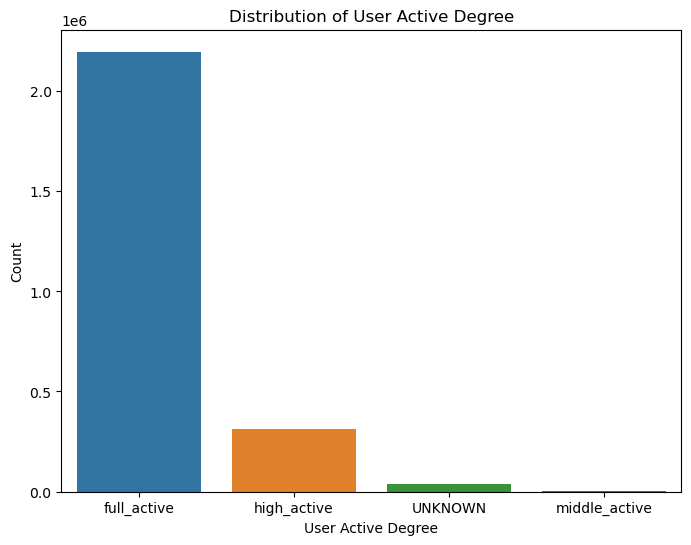

In [5]:
# Distribution of User Active Degree
plt.figure(figsize=(8, 6))
sns.countplot(data=joined_train_data, x='user_active_degree', order=joined_train_data['user_active_degree'].value_counts().index)
plt.title('Distribution of User Active Degree')
plt.xlabel('User Active Degree')
plt.ylabel('Count')
plt.show()

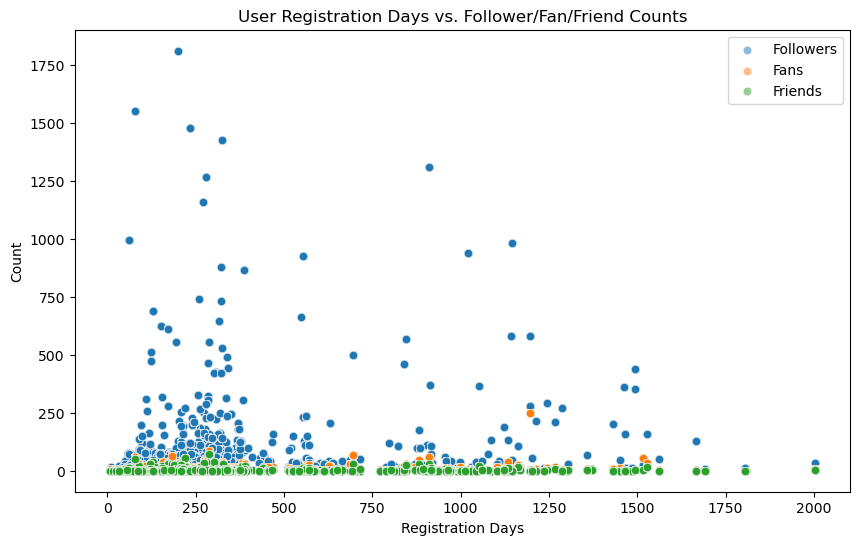

In [6]:
# Relationship between user registration days and follower/fan/friend counts
plt.figure(figsize=(10,6))
sns.scatterplot(data=joined_train_data, x='register_days', y='follow_user_num', label='Followers', alpha=0.5)
sns.scatterplot(data=joined_train_data, x='register_days', y='fans_user_num', label='Fans', alpha=0.5)
sns.scatterplot(data=joined_train_data, x='register_days', y='friend_user_num', label='Friends', alpha=0.5)
plt.title('User Registration Days vs. Follower/Fan/Friend Counts')
plt.xlabel('Registration Days')
plt.ylabel('Count')
plt.legend()
plt.show()

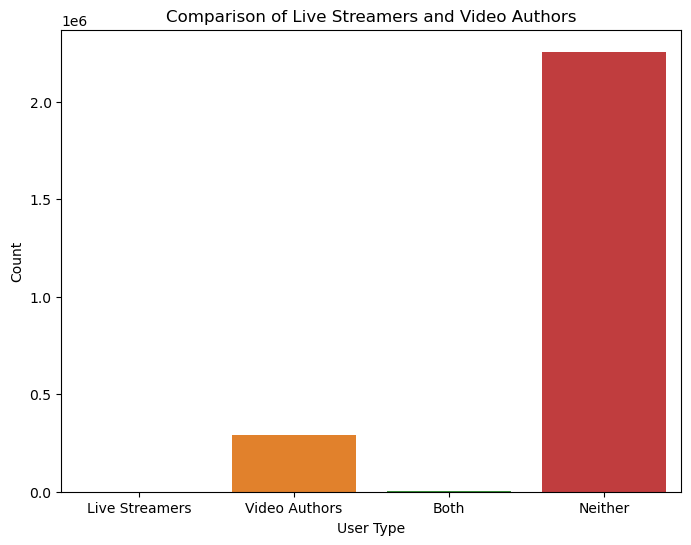

In [7]:
# Comparison of Live Streamers and Video Authors
labels = ['Live Streamers', 'Video Authors', 'Both', 'Neither']
conditions = [
    (joined_train_data['is_live_streamer'] == 1) & (joined_train_data['is_video_author'] == 0),
    (joined_train_data['is_live_streamer'] == 0) & (joined_train_data['is_video_author'] == 1),
    (joined_train_data['is_live_streamer'] == 1) & (joined_train_data['is_video_author'] == 1),
    (joined_train_data['is_live_streamer'] == 0) & (joined_train_data['is_video_author'] == 0)
]
joined_train_data['user_type'] = np.select(conditions, labels)
plt.figure(figsize=(8, 6))
sns.countplot(data=joined_train_data, x='user_type', order=labels)
plt.title('Comparison of Live Streamers and Video Authors')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Average Social Network Metrics')

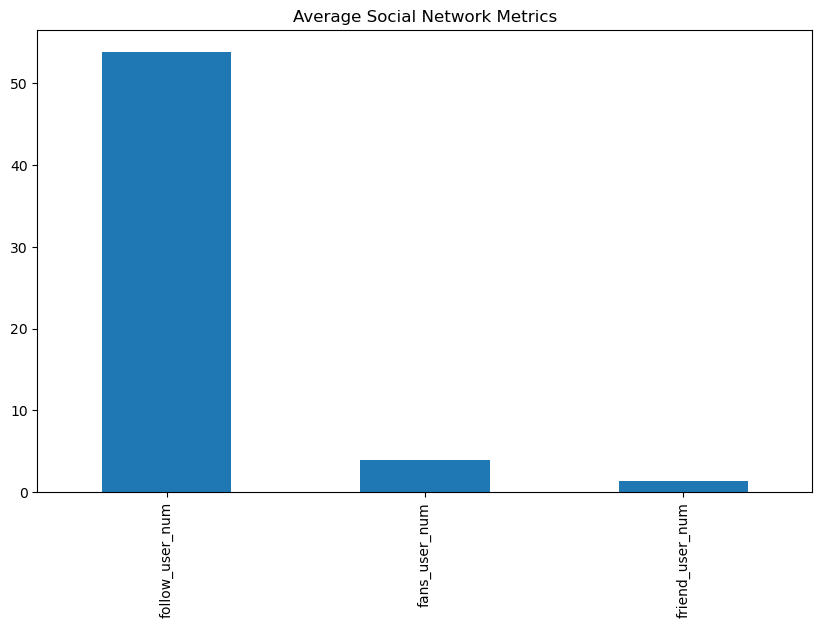

In [8]:
# Social Network Analysis
social_metrics = joined_train_data[['follow_user_num', 'fans_user_num', 'friend_user_num']].mean()
plt.figure(figsize=(10,6))
social_metrics.plot(kind='bar')
plt.title('Average Social Network Metrics')

# Analysis on User Engagement Metrics

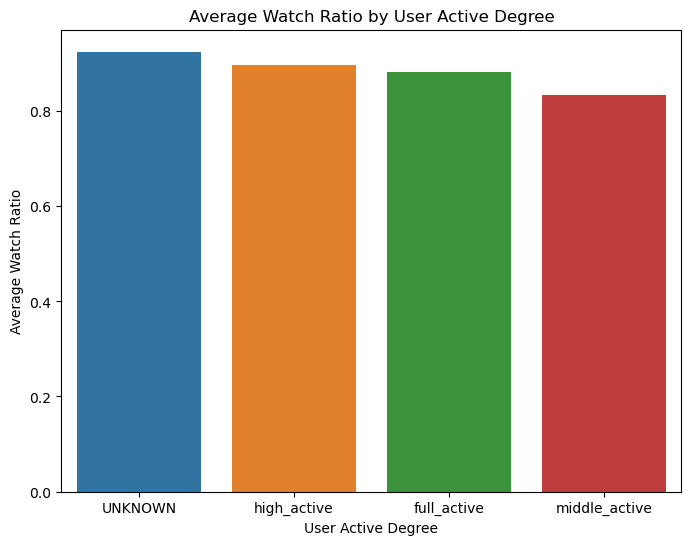

In [9]:
# Average Watch Ratio by User Active Degree
avg_watch_ratio = joined_train_data.groupby('user_active_degree')['watch_ratio'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_watch_ratio, x='user_active_degree', y='watch_ratio', order=avg_watch_ratio.sort_values('watch_ratio', ascending=False)['user_active_degree'])
plt.title('Average Watch Ratio by User Active Degree')
plt.xlabel('User Active Degree')
plt.ylabel('Average Watch Ratio')
plt.show()

/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

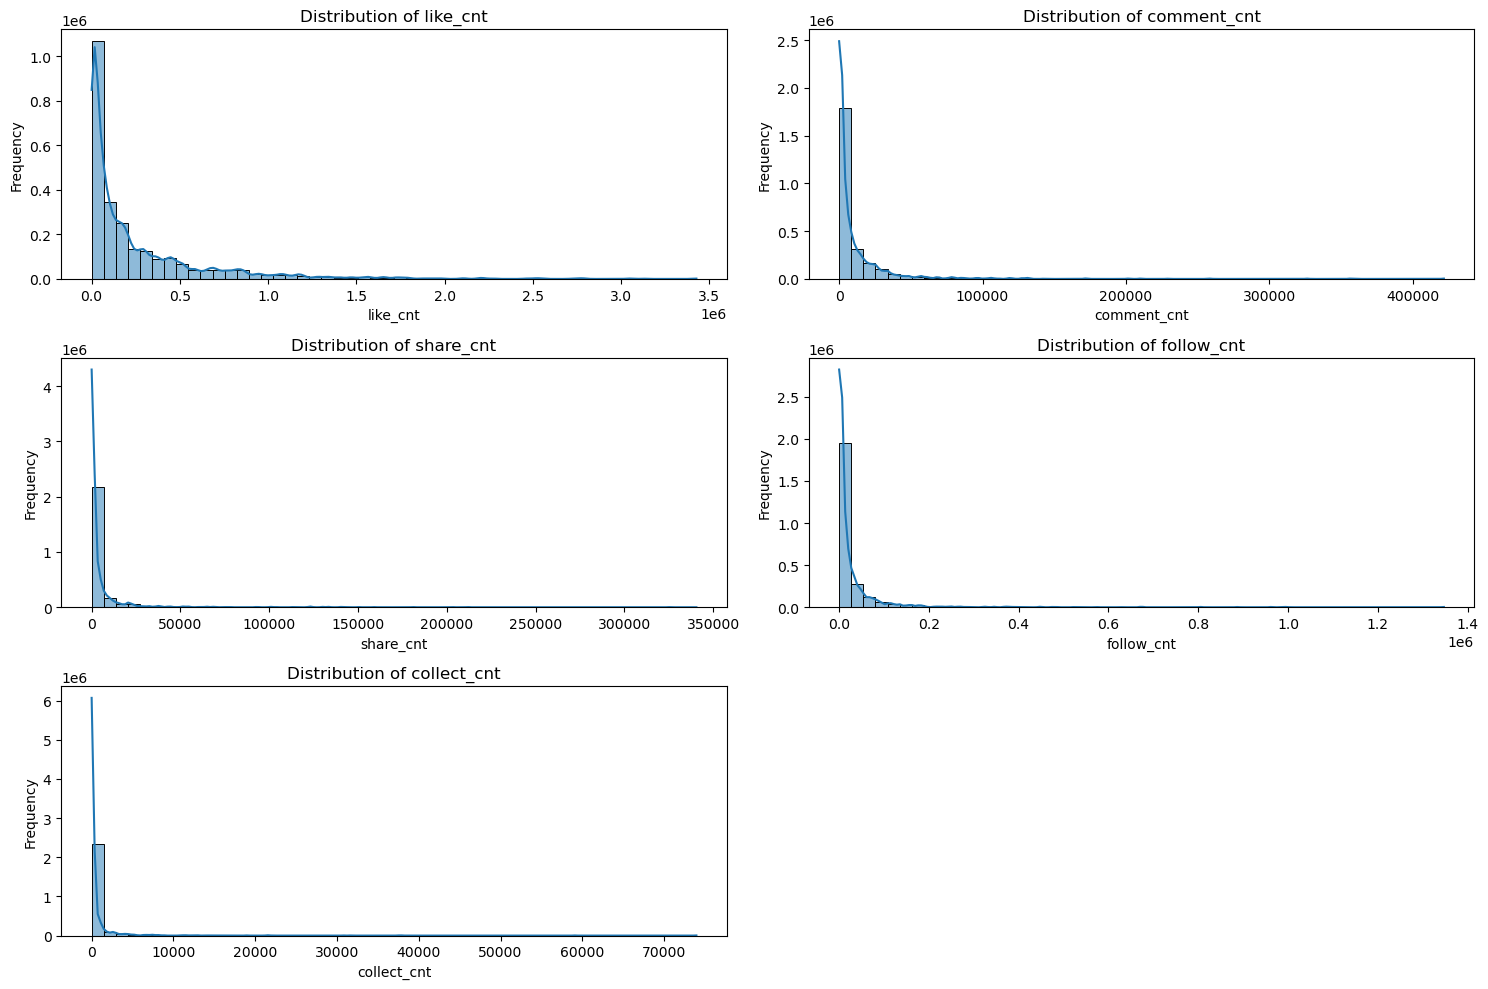

In [10]:
# Distribution of engagement metrics
engagement_metrics = ['like_cnt', 'comment_cnt', 'share_cnt', 'follow_cnt', 'collect_cnt']
plt.figure(figsize=(15,10))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(3, 2, i)
    sns.histplot(joined_train_data[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

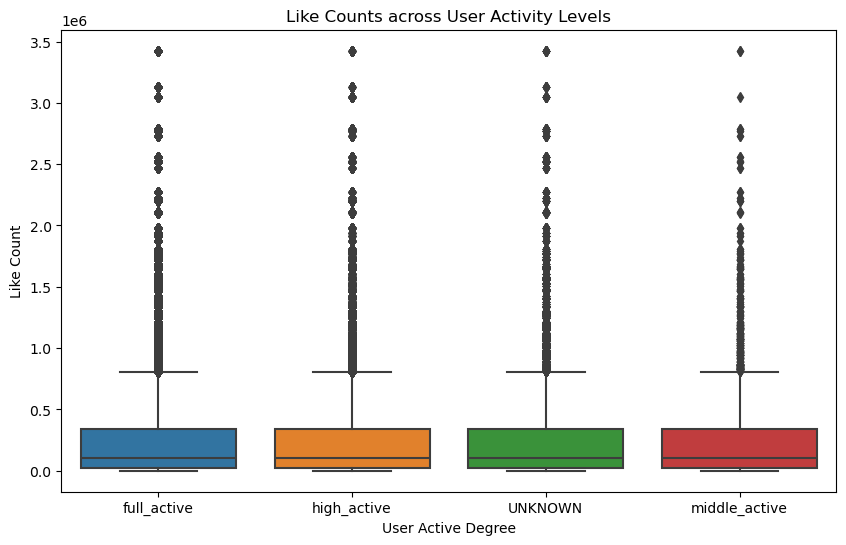

In [11]:
# Engagement metrics across user activity levels
plt.figure(figsize=(10,6))
sns.boxplot(data=joined_train_data, x='user_active_degree', y='like_cnt')
plt.title('Like Counts across User Activity Levels')
plt.xlabel('User Active Degree')
plt.ylabel('Like Count')
plt.show()


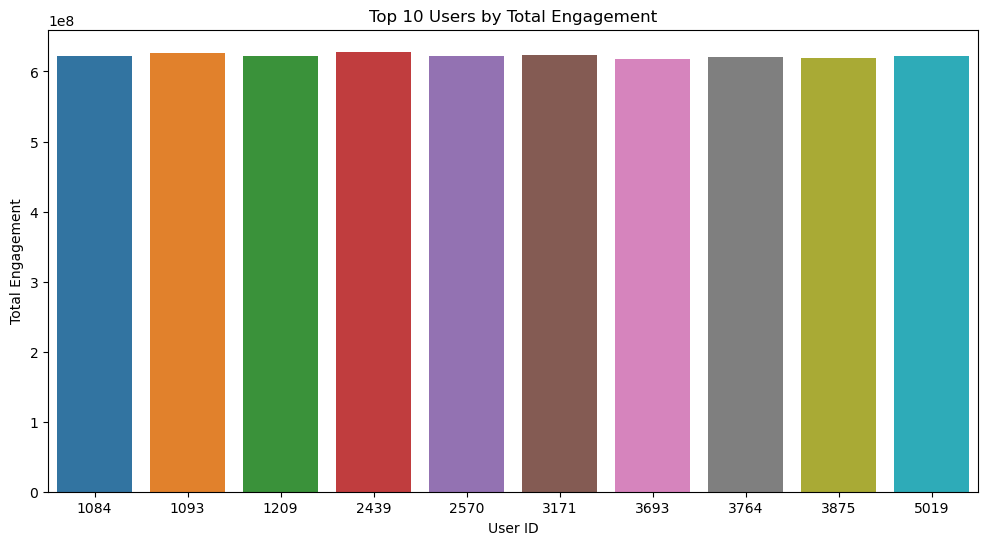

In [12]:
# Top 10 Users by Engagement
joined_train_data['total_engagement'] = joined_train_data[['like_cnt', 'comment_cnt', 'share_cnt', 'follow_cnt', 'collect_cnt']].sum(axis=1)
top_users = joined_train_data.groupby('user_id')['total_engagement'].sum().reset_index().sort_values('total_engagement', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='user_id', y='total_engagement')
plt.title('Top 10 Users by Total Engagement')
plt.xlabel('User ID')
plt.ylabel('Total Engagement')
plt.show()

# Analysis on Content Categories

/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35759 (\N{CJK UNIFIED IDEOGRAPH-8BAF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 390

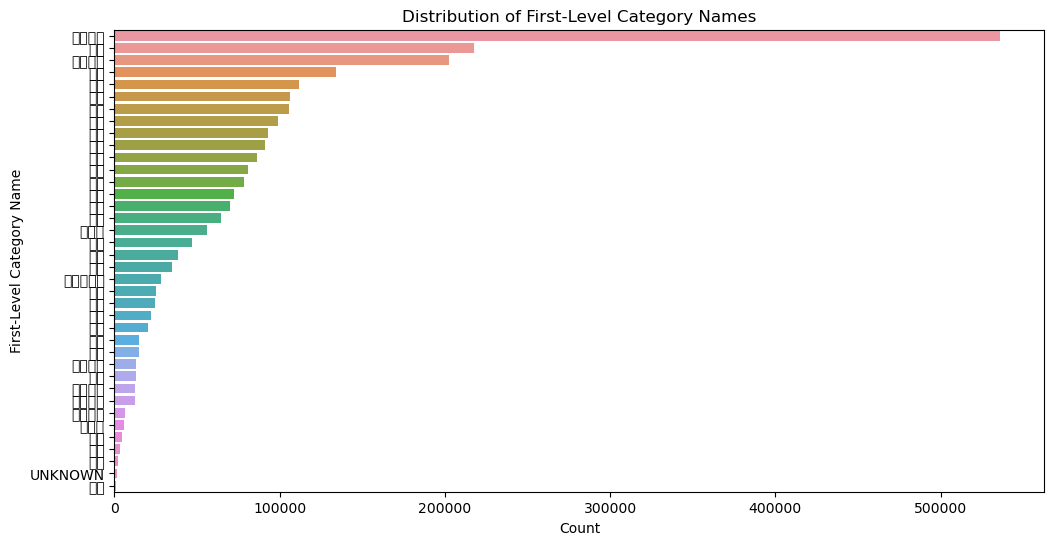

In [13]:
# Distribution of First-Level Category Names
plt.figure(figsize=(12, 6))
sns.countplot(data=joined_train_data, y='first_level_category_name', order=joined_train_data['first_level_category_name'].value_counts().index)
plt.title('Distribution of First-Level Category Names')
plt.xlabel('Count')
plt.ylabel('First-Level Category Name')
plt.show()

/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36130 (\N{CJK UNIFIED IDEOGRAPH-8D22}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30701 (\N{CJK UNIFIED IDEOGRAPH-77ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21095 (\N{CJK UNIFIED IDEOGRAPH-5267}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 282

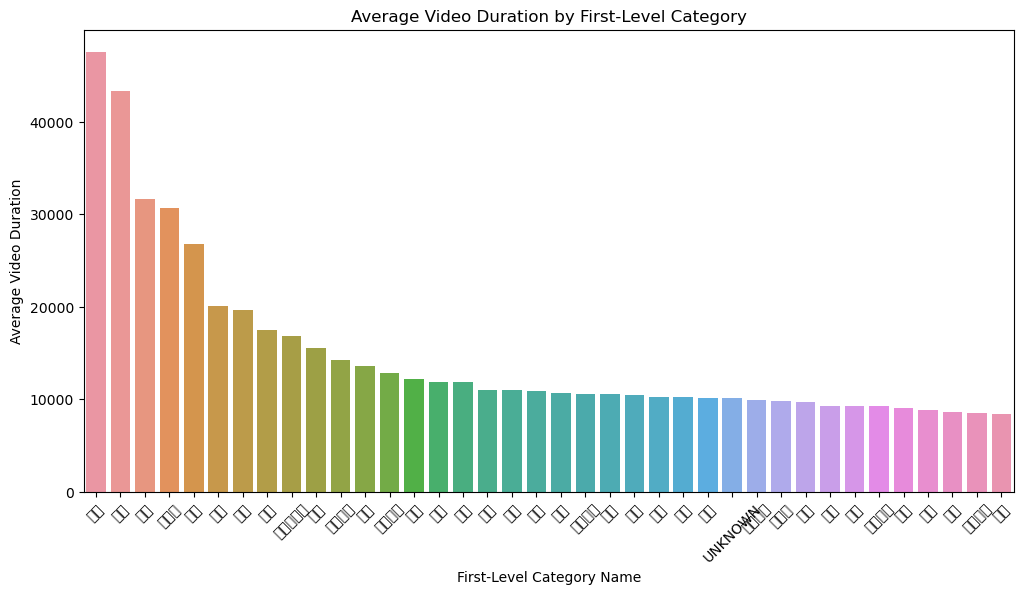

In [14]:
# Video Duration by Category
avg_duration = joined_train_data.groupby('first_level_category_name')['video_duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='first_level_category_name', y='video_duration', order=avg_duration.sort_values('video_duration', ascending=False)['first_level_category_name'])
plt.title('Average Video Duration by First-Level Category')
plt.xlabel('First-Level Category Name')
plt.ylabel('Average Video Duration')
plt.xticks(rotation=45)
plt.show()

# Analysis on Video Performance

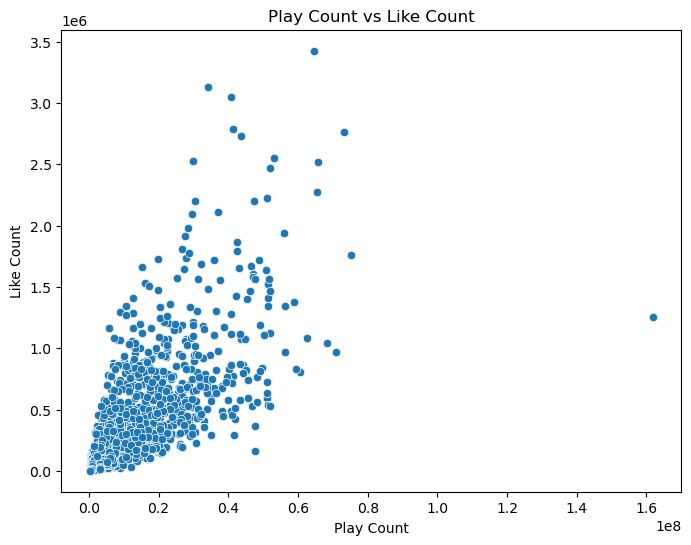

In [15]:
# Play Count vs Like Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=joined_train_data, x='play_cnt', y='like_cnt')
plt.title('Play Count vs Like Count')
plt.xlabel('Play Count')
plt.ylabel('Like Count')
plt.show()

/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


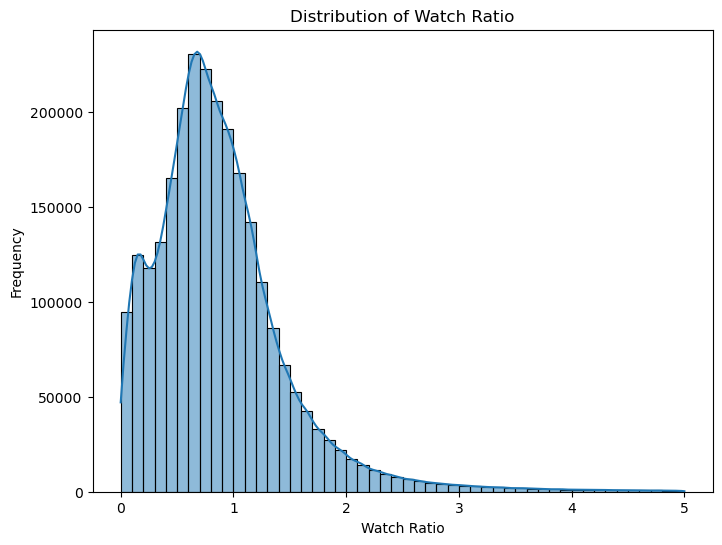

In [16]:
# Watch Ratio Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=joined_train_data, x='watch_ratio', bins=50, kde=True)
plt.title('Distribution of Watch Ratio')
plt.xlabel('Watch Ratio')
plt.ylabel('Frequency')
plt.show()

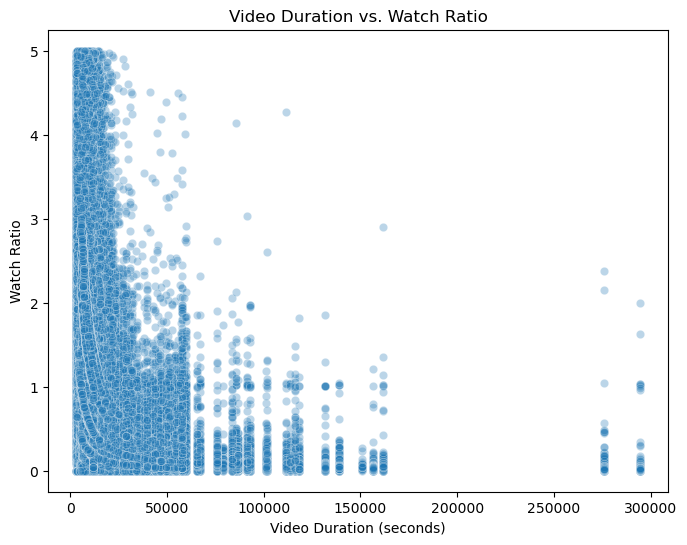

In [17]:
# Relationship between video duration and watch ratio
plt.figure(figsize=(8,6))
sns.scatterplot(data=joined_train_data, x='video_duration', y='watch_ratio', alpha=0.3)
plt.title('Video Duration vs. Watch Ratio')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Watch Ratio')
plt.show()

/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/calvinseptyanto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


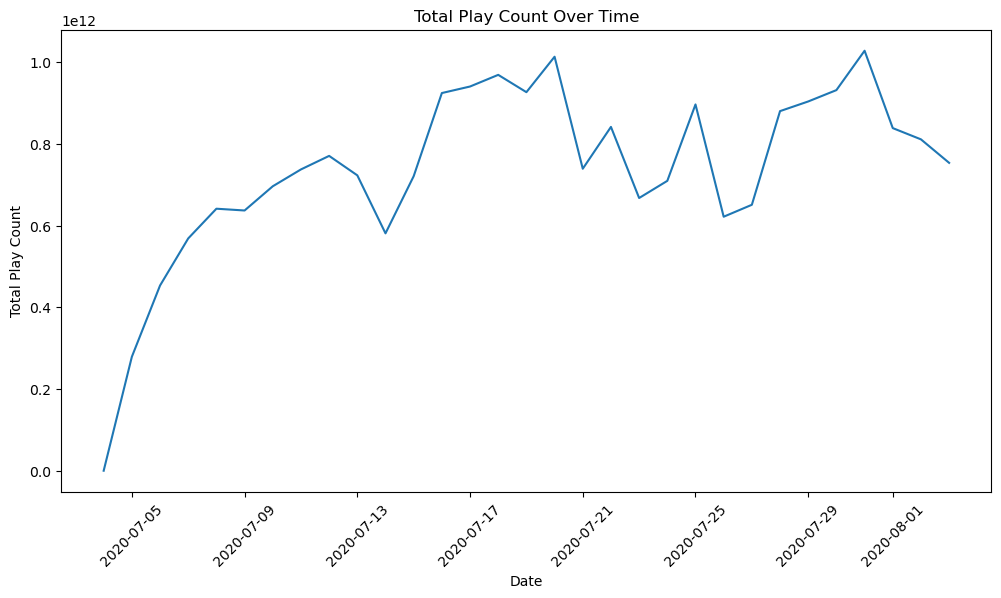

In [18]:
# Video Performance Over Time
joined_train_data['time'] = pd.to_datetime(joined_train_data['time'])
play_counts_over_time = joined_train_data.groupby(joined_train_data['time'].dt.date)['play_cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=play_counts_over_time, x='time', y='play_cnt')
plt.title('Total Play Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.show()